In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

sns.set(style='whitegrid', palette="Set2", font_scale=1.2, rc={"figure.figsize": [20,10]})
%matplotlib inline

pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)

In [2]:
import os
currentpath = os.getcwd()
lenders_path = os.path.join(currentpath,'Data/lenders.csv')
loans_path = os.path.join(currentpath,'Data/loans.csv')
loans_lenders_path = os.path.join(currentpath,'Data/loans_lenders.csv')

In [3]:
loans_lenders = pd.read_csv(loans_lenders_path)
loans = pd.read_csv(loans_path)
lenders = pd.read_csv(lenders_path)

In [4]:
loans_lenders['num_lenders'] = loans_lenders['LENDERS'].str.split(',').apply(len)
loan_df = pd.merge(loans,loans_lenders, how='left',on='LOAN_ID')
loan_df.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,LENDERS,num_lenders
0,1336583,Susan,English,"As a married parent of six children, Susan wor...","As a married parent of six children, Susan wor...",200.00,200.00,funded,2580138.00,NaN,Food,Food,to buy more frozen foods to sell,PH,Philippines,"Guimaras, Iloilo",shared,0.10,PHP,145.00,2017-07-10 04:25:27.000 +0000,2017-08-20 00:30:05.000 +0000,2017-06-23 07:00:00.000 +0000,2017-07-21 00:37:38.000 +0000,8.00,2,1,1,"#Parent, #Woman-Owned Business, #Repeat Borrower",Susan,female,true,monthly,field_partner,keith4253,1.00
1,290654,Dinah,English,"Dinah, 42, is married and has five children. S...",NaN,300.00,300.00,funded,750799.00,NaN,Pub,Food,To buy seats and more drinks to sell,UG,Uganda,Kasese,shared,0.20,UGX,163.00,2011-04-15 08:14:59.000 +0000,NaN,2011-03-30 07:00:00.000 +0000,2011-04-16 14:39:02.000 +0000,8.00,11,1,1,NaN,Dinah,female,true,irregular,field_partner,"don9212, ove1870, arthurarnoldmsme3019, magdal...",9.00
2,544788,Nena,English,Nena works hard to support her family. Nena is...,NaN,375.00,375.00,funded,1325844.00,NaN,Fish Selling,Food,to buy additional boxes of fish to sell.,PH,Philippines,"La Carlota, Negros Occidental",shared,0.10,PHP,145.00,2013-04-03 09:24:26.000 +0000,2013-05-05 16:10:02.000 +0000,2013-03-15 07:00:00.000 +0000,2013-04-06 13:42:42.000 +0000,11.00,10,2,1,volunteer_pick,Nena,female,true,monthly,field_partner,"kevin2206, steven4090, steven4090, iolaire, ol...",9.00
3,1801869,Clarita,English,"Clarita is 69 years old, married, and has two ...","Clarita is 69 years old, married, and has two ...",400.00,400.00,funded,3206591.00,NaN,General Store,Retail,"to buy items such as canned goods, personal ca...",PH,Philippines,"Guimaras, Iloilo",shared,0.10,PHP,145.00,2019-07-19 03:01:23.000 +0000,2019-08-20 20:40:16.000 +0000,2019-07-11 07:00:00.000 +0000,2019-07-22 01:15:29.000 +0000,7.00,12,1,1,"#Elderly, #Woman-Owned Business",Clarita,female,true,monthly,field_partner,"jan4695, lauren8378, vanhara, mawueli, kane804...",11.00
4,1566050,JUVY,English,"Juvy, age 52, earns her living through raising...","Juvy, age 52, earns her living through raising...",300.00,300.00,funded,2894942.00,NaN,Pigs,Agriculture,"to buy feed for her hogs, as well as materials...",PH,Philippines,"Concepcion, Iloilo",shared,0.10,PHP,125.00,2018-07-11 08:59:12.000 +0000,2018-08-11 20:40:04.000 +0000,2018-06-22 07:00:00.000 +0000,2018-07-15 08:56:14.000 +0000,9.00,8,1,1,"#Animals, user_favorite, #Elderly",JUVY,female,true,monthly,field_partner,"jingyuan8918, ferdinand8888, brge8080, jonatha...",7.00


In [5]:
# Check for null and see if data imputation is required
(loan_df.isnull().sum()/loan_df.shape[0]).sort_values(ascending=False).head(10)

VIDEO_ID                          1.00
TAGS                              0.46
DESCRIPTION_TRANSLATED            0.23
CURRENCY_EXCHANGE_COVERAGE_RATE   0.21
PLANNED_EXPIRATION_TIME           0.19
TOWN_NAME                         0.09
RAISED_TIME                       0.05
num_lenders                       0.03
LENDERS                           0.03
BORROWER_NAMES                    0.03
dtype: float64

In [114]:
def borrower_gender(has_male,has_female):
    if (has_male==1) & (has_female==1):
        return 'Both'
    elif has_male==1:
        return 'Male only'
    elif has_female==1:
        return 'Female only'
    return 'Not available'

In [115]:
# Add features
loan_df['funding_rate'] = loan_df['FUNDED_AMOUNT']/loan_df['LOAN_AMOUNT']
loan_df['is_fully_funded'] = np.where(loan_df['funding_rate']>=1,1,0)

loan_df['is_borrower_pictured'] = np.where(loan_df['BORROWER_PICTURED'].str.contains('true')==True,1,0)
loan_df['has_male'] = np.where(loan_df['BORROWER_GENDERS'].str.contains('male')==True,1,0)
loan_df['has_female'] = np.where(loan_df['BORROWER_GENDERS'].str.contains('female')==True,1,0)
loan_df['borrower_gender_cat'] = loan_df.apply(lambda r: borrower_gender(r['has_male'],r['has_female']),axis=1)

In [116]:
# Convert datetime format
loan_df['PLANNED_EXPIRATION_TIME'] = pd.to_datetime(loan_df['PLANNED_EXPIRATION_TIME'])
loan_df['POSTED_TIME'] = pd.to_datetime(loan_df['POSTED_TIME'])
loan_df['loan_planned_duration'] = (loan_df['PLANNED_EXPIRATION_TIME']-loan_df['POSTED_TIME']).dt.days

loan_df['RAISED_TIME'] = pd.to_datetime(loan_df['RAISED_TIME'])
loan_df['loan_raised_duration'] = (loan_df['RAISED_TIME']-loan_df['POSTED_TIME']).dt.days

loan_df['POSTED_YEARMONTH'] = loan_df['POSTED_TIME'].dt.to_period('M')
loan_df['POSTED_YEAR'] = loan_df['POSTED_TIME'].dt.to_period('Y')

# Number of tags
loan_df['num_tags'] = loan_df['TAGS'].str.count(',')+1

# Length of description
loan_df['len_loan_use'] = loan_df['LOAN_USE'].str.len()
loan_df['len_description'] = loan_df['DESCRIPTION'].str.len()

In [117]:
loan_df['POSTED_TIME'] = pd.to_datetime(loan_df['POSTED_TIME'])

loan_df['POSTED_YEAR'] = loan_df['POSTED_TIME'].dt.to_period('Y')

In [118]:
loan_df[loan_df['POSTED_YEAR']=='2019'].isnull().sum()

LOAN_ID                                 0
LOAN_NAME                            1300
ORIGINAL_LANGUAGE                    1296
DESCRIPTION                          1296
DESCRIPTION_TRANSLATED               1296
FUNDED_AMOUNT                           0
LOAN_AMOUNT                             0
STATUS                                  0
IMAGE_ID                             1296
VIDEO_ID                           218889
ACTIVITY_NAME                           0
SECTOR_NAME                             0
LOAN_USE                             1296
COUNTRY_CODE                            8
COUNTRY_NAME                            0
TOWN_NAME                            8255
CURRENCY_POLICY                         0
CURRENCY_EXCHANGE_COVERAGE_RATE     35983
CURRENCY                                0
PARTNER_ID                            941
POSTED_TIME                             0
PLANNED_EXPIRATION_TIME                 0
DISBURSE_TIME                         186
RAISED_TIME                       

In [119]:
loan_df.groupby(['POSTED_YEAR'])['LOAN_ID'].count()

POSTED_YEAR
2006      3200
2007     26314
2008     50697
2009     81629
2010     92902
2011    113009
2012    133847
2013    140035
2014    174232
2015    181835
2016    197236
2017    225476
2018    229633
2019    219005
2020     82074
Freq: A-DEC, Name: LOAN_ID, dtype: int64

In [120]:
loan_df_2019 = loan_df[loan_df['POSTED_YEAR']=='2019']

In [121]:
cont = pd.read_csv('continent_mapping.csv')
loan_df_2019_2 = pd.merge(loan_df_2019,cont,left_on='COUNTRY_NAME',right_on='Country',how='left')

In [122]:
loan_df_2019.groupby('POSTED_YEARMONTH')['is_fully_funded'].value_counts(normalize=True)

POSTED_YEARMONTH  is_fully_funded
2019-01           1                 0.88
                  0                 0.12
2019-02           1                 0.93
                  0                 0.07
2019-03           1                 0.90
                  0                 0.10
2019-04           1                 0.86
                  0                 0.14
2019-05           1                 0.89
                  0                 0.11
2019-06           1                 0.92
                  0                 0.08
2019-07           1                 0.88
                  0                 0.12
2019-08           1                 0.95
                  0                 0.05
2019-09           1                 0.97
                  0                 0.03
2019-10           1                 0.98
                  0                 0.02
2019-11           1                 0.99
                  0                 0.01
2019-12           1                 1.00
                  0    

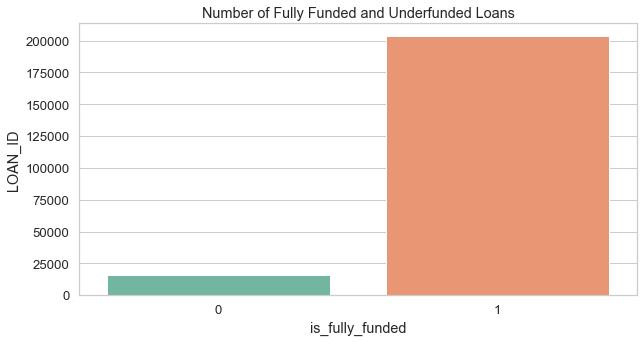

In [185]:
plt.figure(figsize=(10,5))
plt.title('Number of Fully Funded and Underfunded Loans')
sns.barplot(x='is_fully_funded',y='LOAN_ID',data=loan_df_2019.groupby('is_fully_funded')['LOAN_ID'].count().reset_index())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

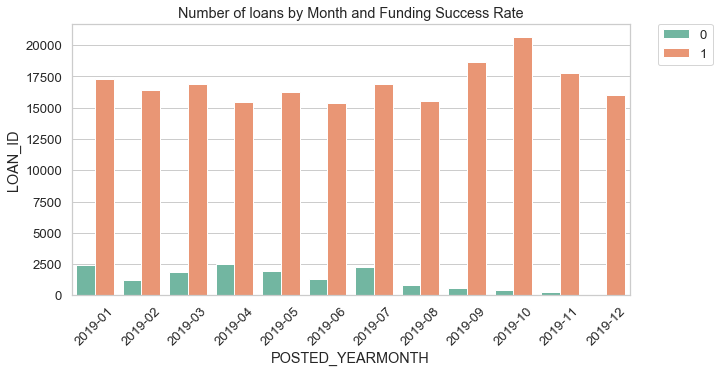

In [37]:
plt.figure(figsize=(10,5))
plt.title('Number of loans by Month and Funding Success Rate')
sns.barplot(x='POSTED_YEARMONTH',y='LOAN_ID',data=loan_df_2019.groupby(['POSTED_YEARMONTH','is_fully_funded'])['LOAN_ID'].count().reset_index(),hue='is_fully_funded')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.xticks(rotation=45)


In [81]:
# loan_df_2019.groupby(['COUNTRY_CODE'])['is_fully_funded'].value_counts(normalize=True)
plot = pd.pivot_table(index='Continent',columns='is_fully_funded',values='LOAN_ID',data=loan_df_2019_2,aggfunc='count').reset_index()

In [164]:
df_group = loan_df_2019_2.groupby('Continent')['is_fully_funded'].value_counts(normalize=True)
df_group = df_group.mul(100)
df_group = df_group.rename('percent').reset_index()
df_group = df_group[df_group['is_fully_funded']==0]
df_group = df_group.sort_values(by='percent',ascending=False).head(20)
df_group

,Continent,is_fully_funded,percent
9,Oceania,0,14.47
5,Europe,0,13.37
7,North America,0,9.66
1,Africa,0,8.98
11,South America,0,8.41
3,Asia,0,4.03


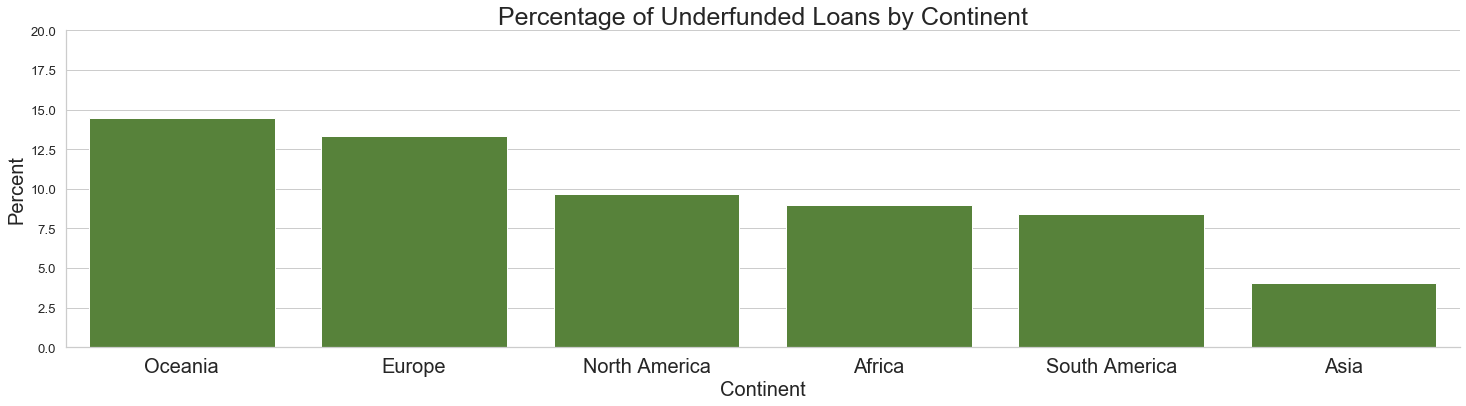

In [165]:
g = sns.catplot(x='Continent',y='percent',color='#558E2E',kind='bar', data=df_group,aspect=4)
g.ax.set_ylim(0,20)
g.ax.set_title('Percentage of Underfunded Loans by Continent',fontdict={'fontsize': 25})
g.ax.set_xlabel('Continent',fontsize=20)
g.ax.tick_params(axis='x', labelsize=20)
g.ax.set_ylabel('Percent',fontsize=20)

# g.set_xticklabels(rotation=30)
plt.show()
# plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.1f}'.format(p.get_height())
    g.ax.text(_x, _y, txt, ha="center",fontsize=12)

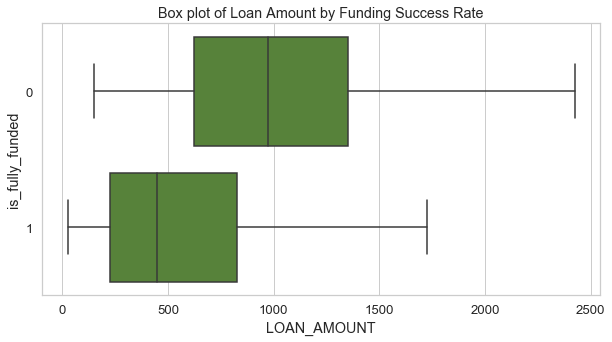

In [166]:
plt.figure(figsize=(10,5))
plt.title('Box plot of Loan Amount by Funding Success Rate')
sns.boxplot(y='is_fully_funded', x='LOAN_AMOUNT',data=loan_df_2019_2,color='#558E2E',showfliers=False,orient="h")


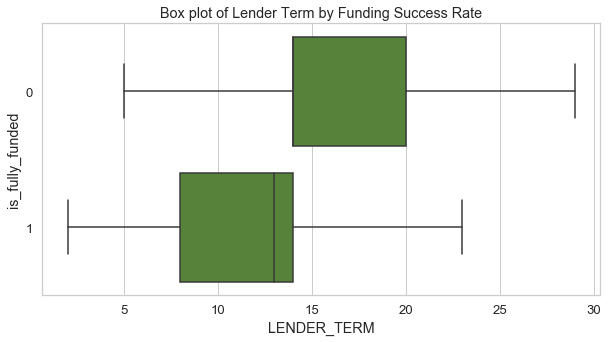

In [167]:
plt.figure(figsize=(10,5))
plt.title('Box plot of Lender Term by Funding Success Rate')
sns.boxplot(y='is_fully_funded', x='LENDER_TERM',data=loan_df_2019_2,color='#558E2E',showfliers=False,orient="h")


In [168]:
loan_df_2019_2.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,LENDERS,num_lenders,funding_rate,is_fully_funded,is_borrower_pictured,has_male,has_female,borrower_gender_cat,loan_planned_duration,loan_raised_duration,POSTED_YEARMONTH,POSTED_YEAR,num_tags,len_loan_use,len_description,Country,Continent
0,1801869,Clarita,English,"Clarita is 69 years old, married, and has two ...","Clarita is 69 years old, married, and has two ...",400.00,400.00,funded,3206591.00,NaN,General Store,Retail,"to buy items such as canned goods, personal ca...",PH,Philippines,"Guimaras, Iloilo",shared,0.10,PHP,145.00,2019-07-19 03:01:23+00:00,2019-08-20 20:40:16+00:00,2019-07-11 07:00:00.000 +0000,2019-07-22 01:15:29+00:00,7.00,12,1,1,"#Elderly, #Woman-Owned Business",Clarita,female,true,monthly,field_partner,"jan4695, lauren8378, vanhara, mawueli, kane804...",11.00,1.00,1,1,1,1,Both,32.00,2.00,2019-07,2019,2.00,93.00,407.00,Philippines,Asia
1,1862433,Jamiru,English,"Jamiru is a married man with two children, wit...","Jamiru is a married man with two children, wit...",75.00,75.00,funded,3288294.00,NaN,Motorcycle Transport,Transportation,to buy a second motorcycle to increase his inc...,UG,Uganda,Jinja,shared,0.00,UGX,222.00,2019-10-22 13:52:45+00:00,2019-11-25 18:20:05+00:00,2019-10-04 07:00:00.000 +0000,2019-11-25 18:22:02+00:00,14.00,3,1,1,"#Parent, #Biz Durable Asset, user_favorite",Jamiru,male,true,monthly,field_partner,"julio1036, teri1052, tom8779",3.00,1.00,1,1,1,0,Male only,34.00,34.00,2019-10,2019,3.00,95.00,497.00,Uganda,Africa
2,1770065,Champa's Group,English,Champa’s Group lives in a rural village in Kan...,Champa’s Group lives in a rural village in Kan...,250.00,250.00,funded,3164727.00,NaN,Home Appliances,Personal Use,to buy a water filter to provide safe drinking...,KH,Cambodia,Kandal,shared,0.10,KHR,311.00,2019-05-27 09:28:31+00:00,2019-06-27 22:40:04+00:00,2019-05-26 07:00:00.000 +0000,2019-05-29 10:57:47+00:00,8.00,9,2,1,NaN,"Say, Champa, Kimchheng, Saikea, Kimsry","male, female, female, female, female","true, true, true, true, true",monthly,field_partner,"nms, beci, stuart8160, paolo9799, dan3803, gay...",8.00,1.00,1,1,1,1,Both,31.00,2.00,2019-05,2019,NaN,68.00,356.00,Cambodia,Asia
3,1899384,Evelyn,English,Evelyn is a single woman with two children. Sh...,Evelyn is a single woman with two children. Sh...,600.00,600.00,funded,3340778.00,NaN,General Store,Retail,to purchase items to sell like canned goods an...,PH,Philippines,"San Carlos, Negros Occidental",standard,NaN,PHP,145.00,2019-12-19 09:35:50+00:00,2020-02-16 17:55:56+00:00,2019-11-28 08:00:00.000 +0000,2020-02-01 10:43:46+00:00,14.00,22,1,1,"#Single Parent, #Parent, #Woman-Owned Business",Evelyn,female,true,monthly,field_partner,"gooddogg1, mark75827460, jose49739011, jennife...",18.00,1.00,1,1,1,1,Both,59.00,44.00,2019-12,2019,3.00,70.00,429.00,Philippines,Asia
4,1835971,Christopher,English,"Christopher, 54-year-old father of seven, is a...","Christopher, 54-year-old father of seven, is a...",300.00,300.00,funded,3253394.00,NaN,Farming,Agriculture,"to buy hybrid seeds and good fertilizer, so an...",KE,Kenya,"Eldoret, Rift Valley",shared,0.00,KES,156.00,2019-09-16 04:22:02+00:00,2019-10-16 05:50:07+00:00,2019-09-13 07:00:00.000 +0000,2019-09-26 12:12:32+00:00,14.00,9,1,1,#Elderly,Christopher,male,true,monthly,field_partner,"fawaz3765, rebecca1022, wakibi, themissionbelt...",9.00,1.00,1,1,1,0,Male only,30.00,10.00,2019-09,2019,1.00,147.00,1068.00,Kenya,Africa


In [169]:
df_group = loan_df_2019_2.groupby('SECTOR_NAME')['is_fully_funded'].value_counts(normalize=True)
df_group = df_group.mul(100)
df_group = df_group.rename('percent').reset_index()
df_group = df_group[df_group['is_fully_funded']==0]
df_group = df_group.sort_values(by='percent',ascending=False)
df_group

,SECTOR_NAME,is_fully_funded,percent
27,Transportation,0,20.20
29,Wholesale,0,14.18
15,Health,0,10.09
23,Retail,0,9.93
7,Construction,0,9.04
25,Services,0,9.00
1,Agriculture,0,8.45
5,Clothing,0,8.44
13,Food,0,7.26
11,Entertainment,0,6.86


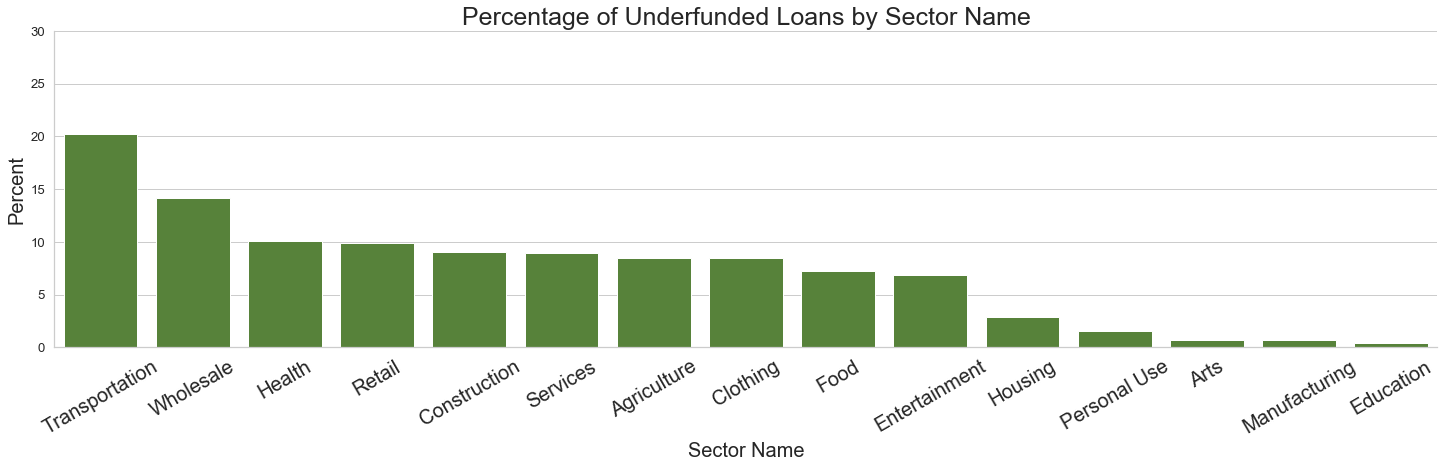

In [170]:
g = sns.catplot(x='SECTOR_NAME',y='percent',color='#558E2E',kind='bar', data=df_group,aspect=4)
g.ax.set_ylim(0,30)
g.ax.set_title('Percentage of Underfunded Loans by Sector Name',fontdict={'fontsize': 25})
g.ax.set_xlabel('Sector Name',fontsize=20)
g.ax.tick_params(axis='x', labelsize=20)
g.ax.set_ylabel('Percent',fontsize=20)
g.set_xticklabels(rotation=30)
plt.show()
# plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.1f}'.format(p.get_height())
    g.ax.text(_x, _y, txt, ha="center",fontsize=12)

In [171]:
df_group = loan_df_2019_2.groupby('ORIGINAL_LANGUAGE')['is_fully_funded'].value_counts(normalize=True)
df_group = df_group.mul(100)
df_group = df_group.rename('percent').reset_index()
df_group = df_group[df_group['is_fully_funded']==0]
df_group = df_group.sort_values(by='percent',ascending=False)
df_group

,ORIGINAL_LANGUAGE,is_fully_funded,percent
7,Russian,0,14.60
9,Spanish,0,8.81
5,Portuguese,0,7.60
1,English,0,6.57
3,French,0,2.27


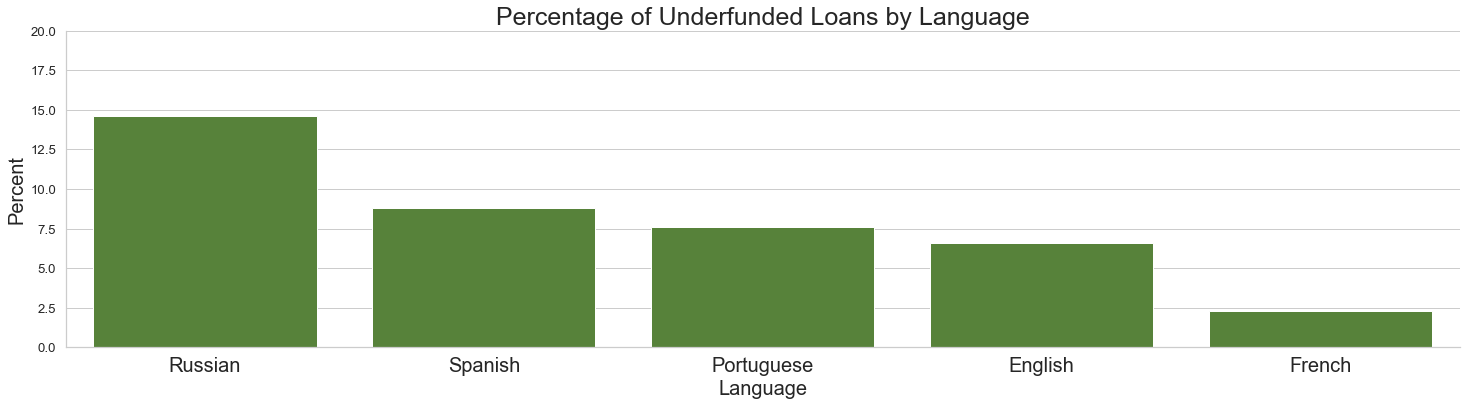

In [172]:
g = sns.catplot(x='ORIGINAL_LANGUAGE',y='percent',kind='bar',color='#558E2E',data=df_group,aspect=4)
g.ax.set_ylim(0,20)
g.ax.set_title('Percentage of Underfunded Loans by Language',fontdict={'fontsize': 25})
g.ax.set_xlabel('Language',fontsize=20)
g.ax.tick_params(axis='x', labelsize=20)
g.ax.set_ylabel('Percent',fontsize=20)
# g.set_xticklabels(rotation=30)
plt.show()
# plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.1f}'.format(p.get_height())
    g.ax.text(_x, _y, txt, ha="center",fontsize=12)

In [173]:
df_group = loan_df_2019_2.groupby('borrower_gender_cat')['is_fully_funded'].value_counts(normalize=True)
df_group = df_group.mul(100)
df_group = df_group.rename('percent').reset_index()
df_group = df_group[df_group['is_fully_funded']==0]
df_group = df_group.sort_values(by='percent',ascending=False)
df_group

,borrower_gender_cat,is_fully_funded,percent
5,Not available,0,34.10
3,Male only,0,16.36
1,Both,0,4.78


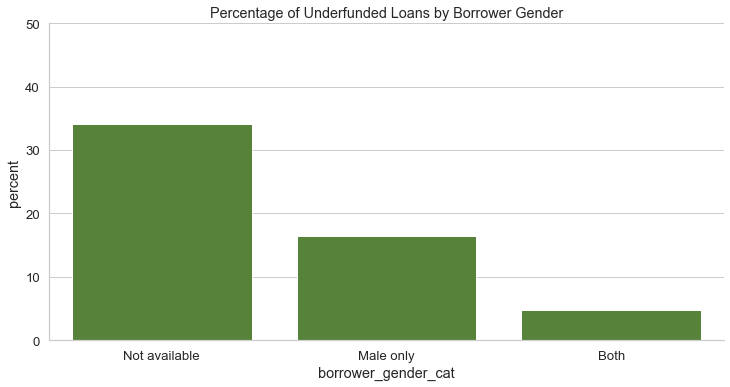

In [175]:
sns.catplot(x='borrower_gender_cat',y='percent',color='#558E2E',kind='bar',data=df_group,aspect=2)
plt.ylim(0,50)
plt.title('Percentage of Underfunded Loans by Borrower Gender')
plt.show()


In [40]:
loan_df_2019_dropna = loan_df_2019[['ORIGINAL_LANGUAGE','STATUS','ACTIVITY_NAME','SECTOR_NAME','COUNTRY_CODE','COUNTRY_NAME',
           'TOWN_NAME','CURRENCY_POLICY','CURRENCY','borrower_gender_cat','is_borrower_pictured','REPAYMENT_INTERVAL',
           'DISTRIBUTION_MODEL','POSTED_YEARMONTH','is_fully_funded']].dropna()

In [41]:
(loan_df_2019_dropna.groupby('SECTOR_NAME')['is_fully_funded'].mean()).sort_values(ascending=True)

SECTOR_NAME
Transportation   0.81
Wholesale        0.86
Health           0.90
Retail           0.90
Services         0.91
Construction     0.92
Agriculture      0.92
Clothing         0.92
Food             0.93
Entertainment    0.93
Housing          0.97
Personal Use     0.98
Arts             1.00
Education        1.00
Manufacturing    1.00
Name: is_fully_funded, dtype: float64

In [53]:
(loan_1819.groupby('ACTIVITY_NAME')['is_fully_funded'].mean()).sort_values(ascending=True)

ACTIVITY_NAME
Technology            0.69
Wedding Expenses      0.74
Vehicle               0.74
Taxi                  0.75
Hotel                 0.77
                      ... 
Recycling             1.00
Religious Articles    1.00
Bicycle Sales         1.00
Musical Performance   1.00
Adult Care            1.00
Name: is_fully_funded, Length: 163, dtype: float64

In [54]:
(loan_1819.groupby('COUNTRY_NAME')['is_fully_funded'].mean()).sort_values(ascending=True)

COUNTRY_NAME
Kosovo             0.70
United States      0.76
Armenia            0.77
Ukraine            0.77
Samoa              0.79
                   ... 
Malawi             1.00
Papua New Guinea   1.00
Panama             1.00
Thailand           1.00
India              1.00
Name: is_fully_funded, Length: 75, dtype: float64

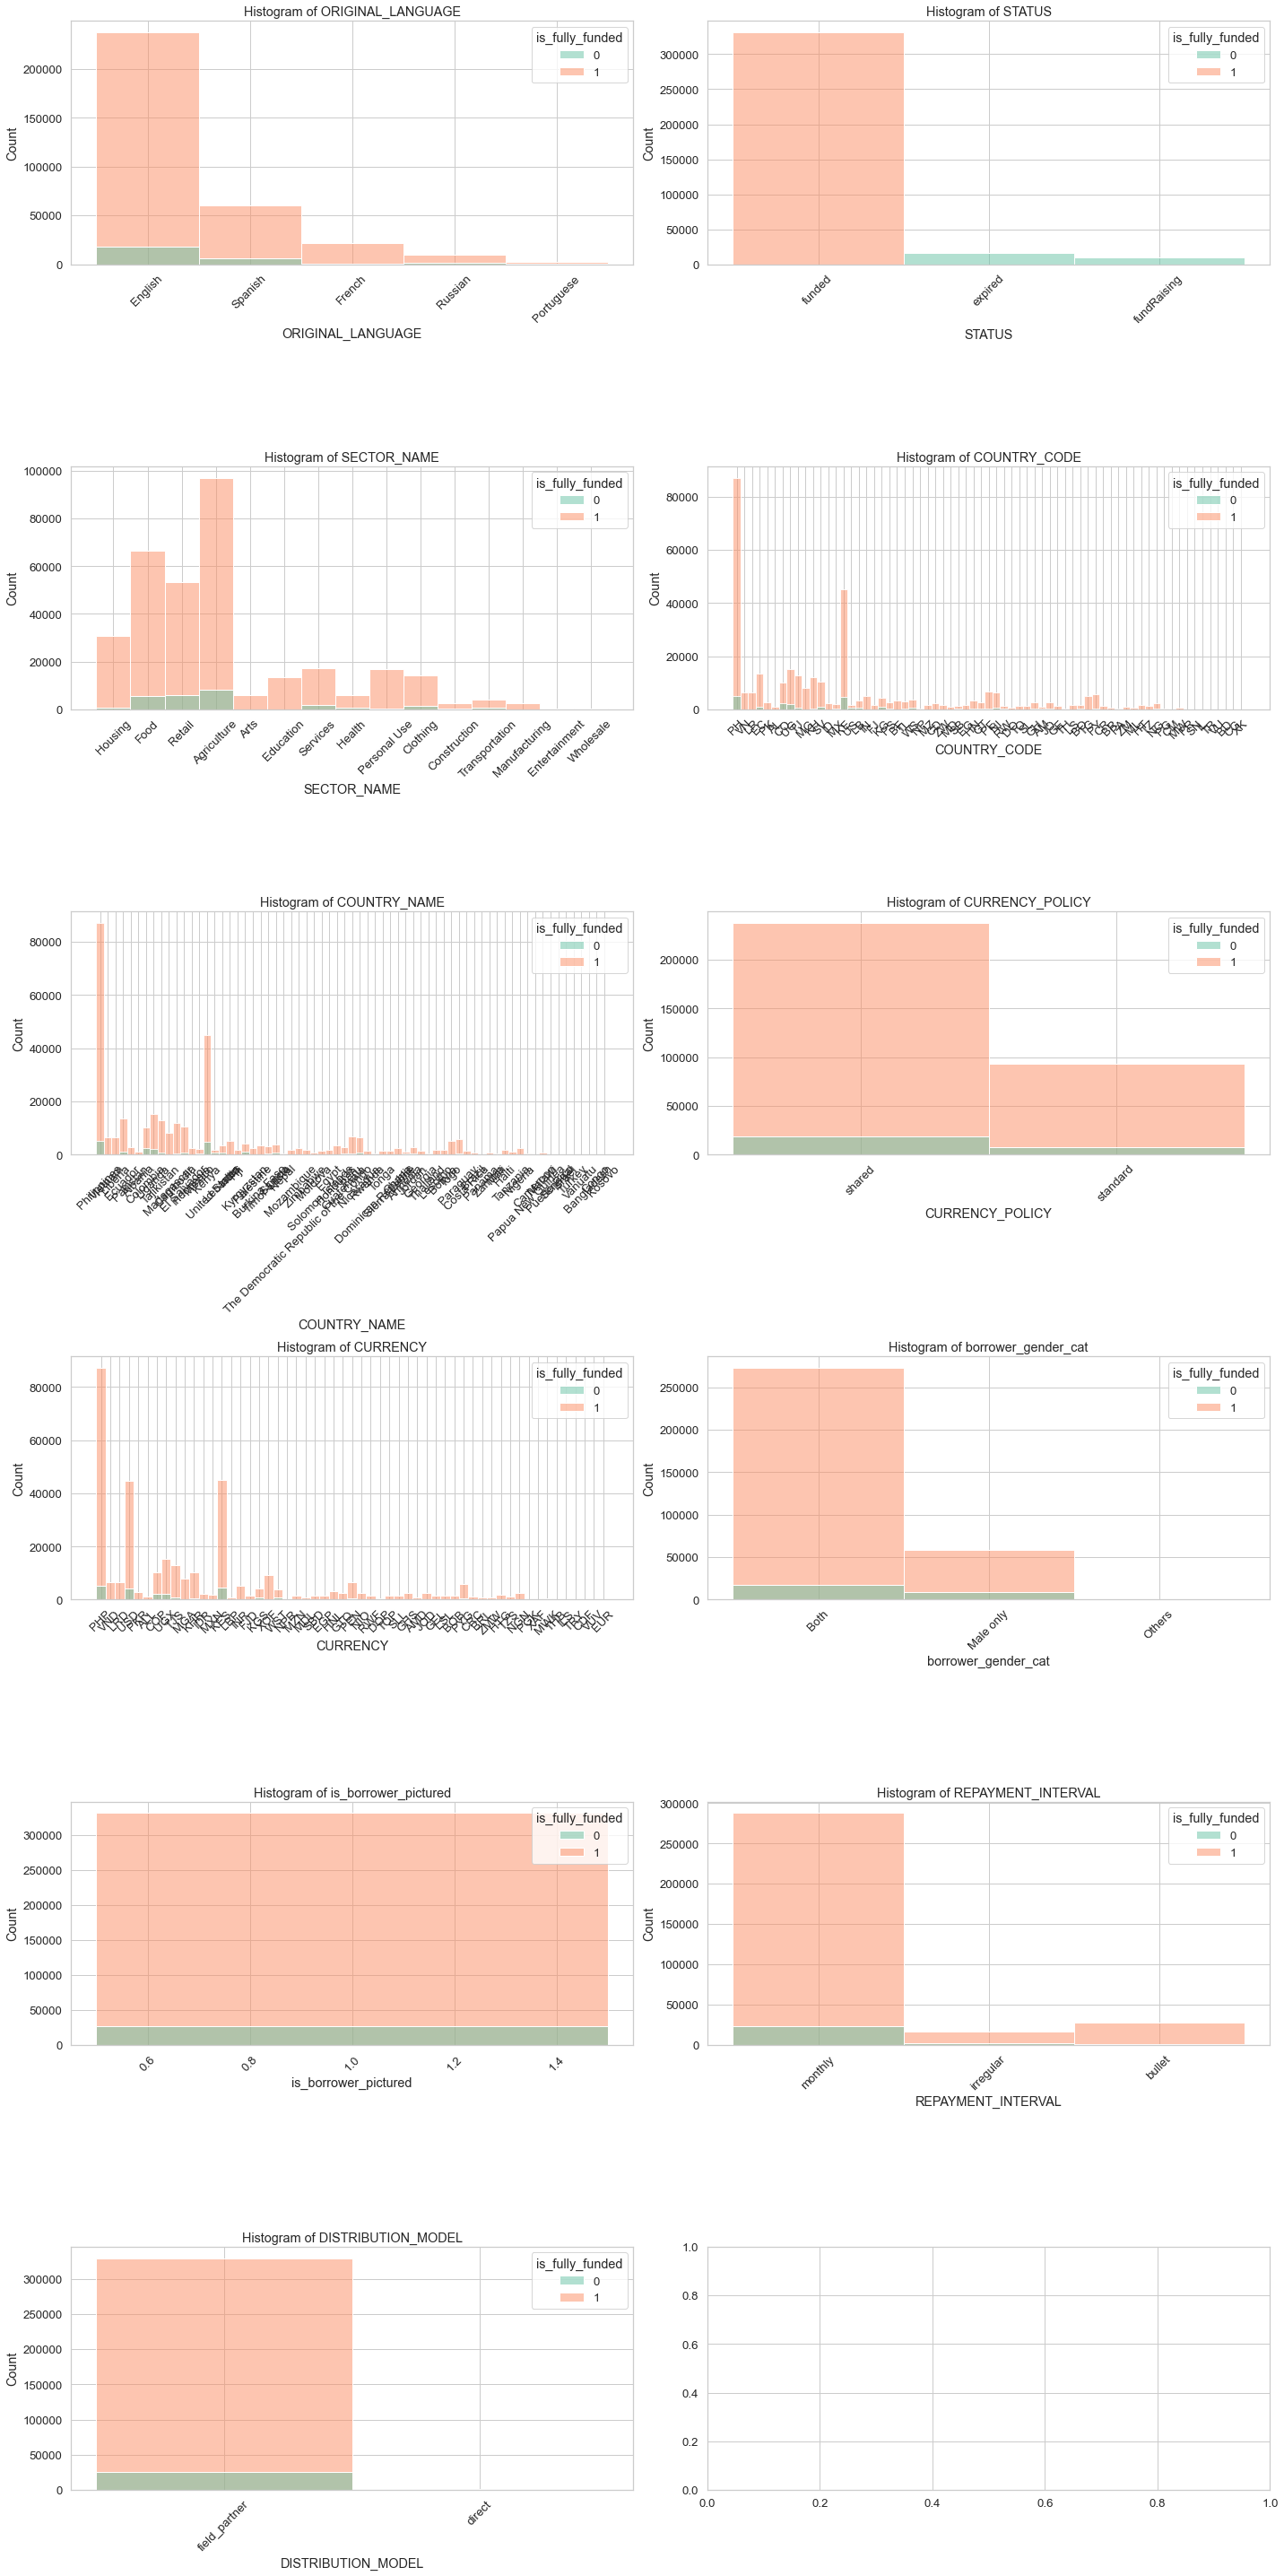

In [55]:
plot_by = ['ORIGINAL_LANGUAGE','STATUS','SECTOR_NAME','COUNTRY_CODE','COUNTRY_NAME',
           'CURRENCY_POLICY','CURRENCY','borrower_gender_cat','is_borrower_pictured','REPAYMENT_INTERVAL',
           'DISTRIBUTION_MODEL']
fig, ax = plt.subplots(int(np.ceil(len(plot_by)/2)), 2, figsize=(20, 40))
for variable, subplot in zip(plot_by, ax.flatten()):
    sns.histplot(loan_1920_dropna,x=variable,hue='is_fully_funded',ax=subplot,palette='Set2')
    subplot.title.set_text(f"Histogram of {variable}")
    subplot.tick_params('x',labelrotation=45)
    plt.tight_layout()

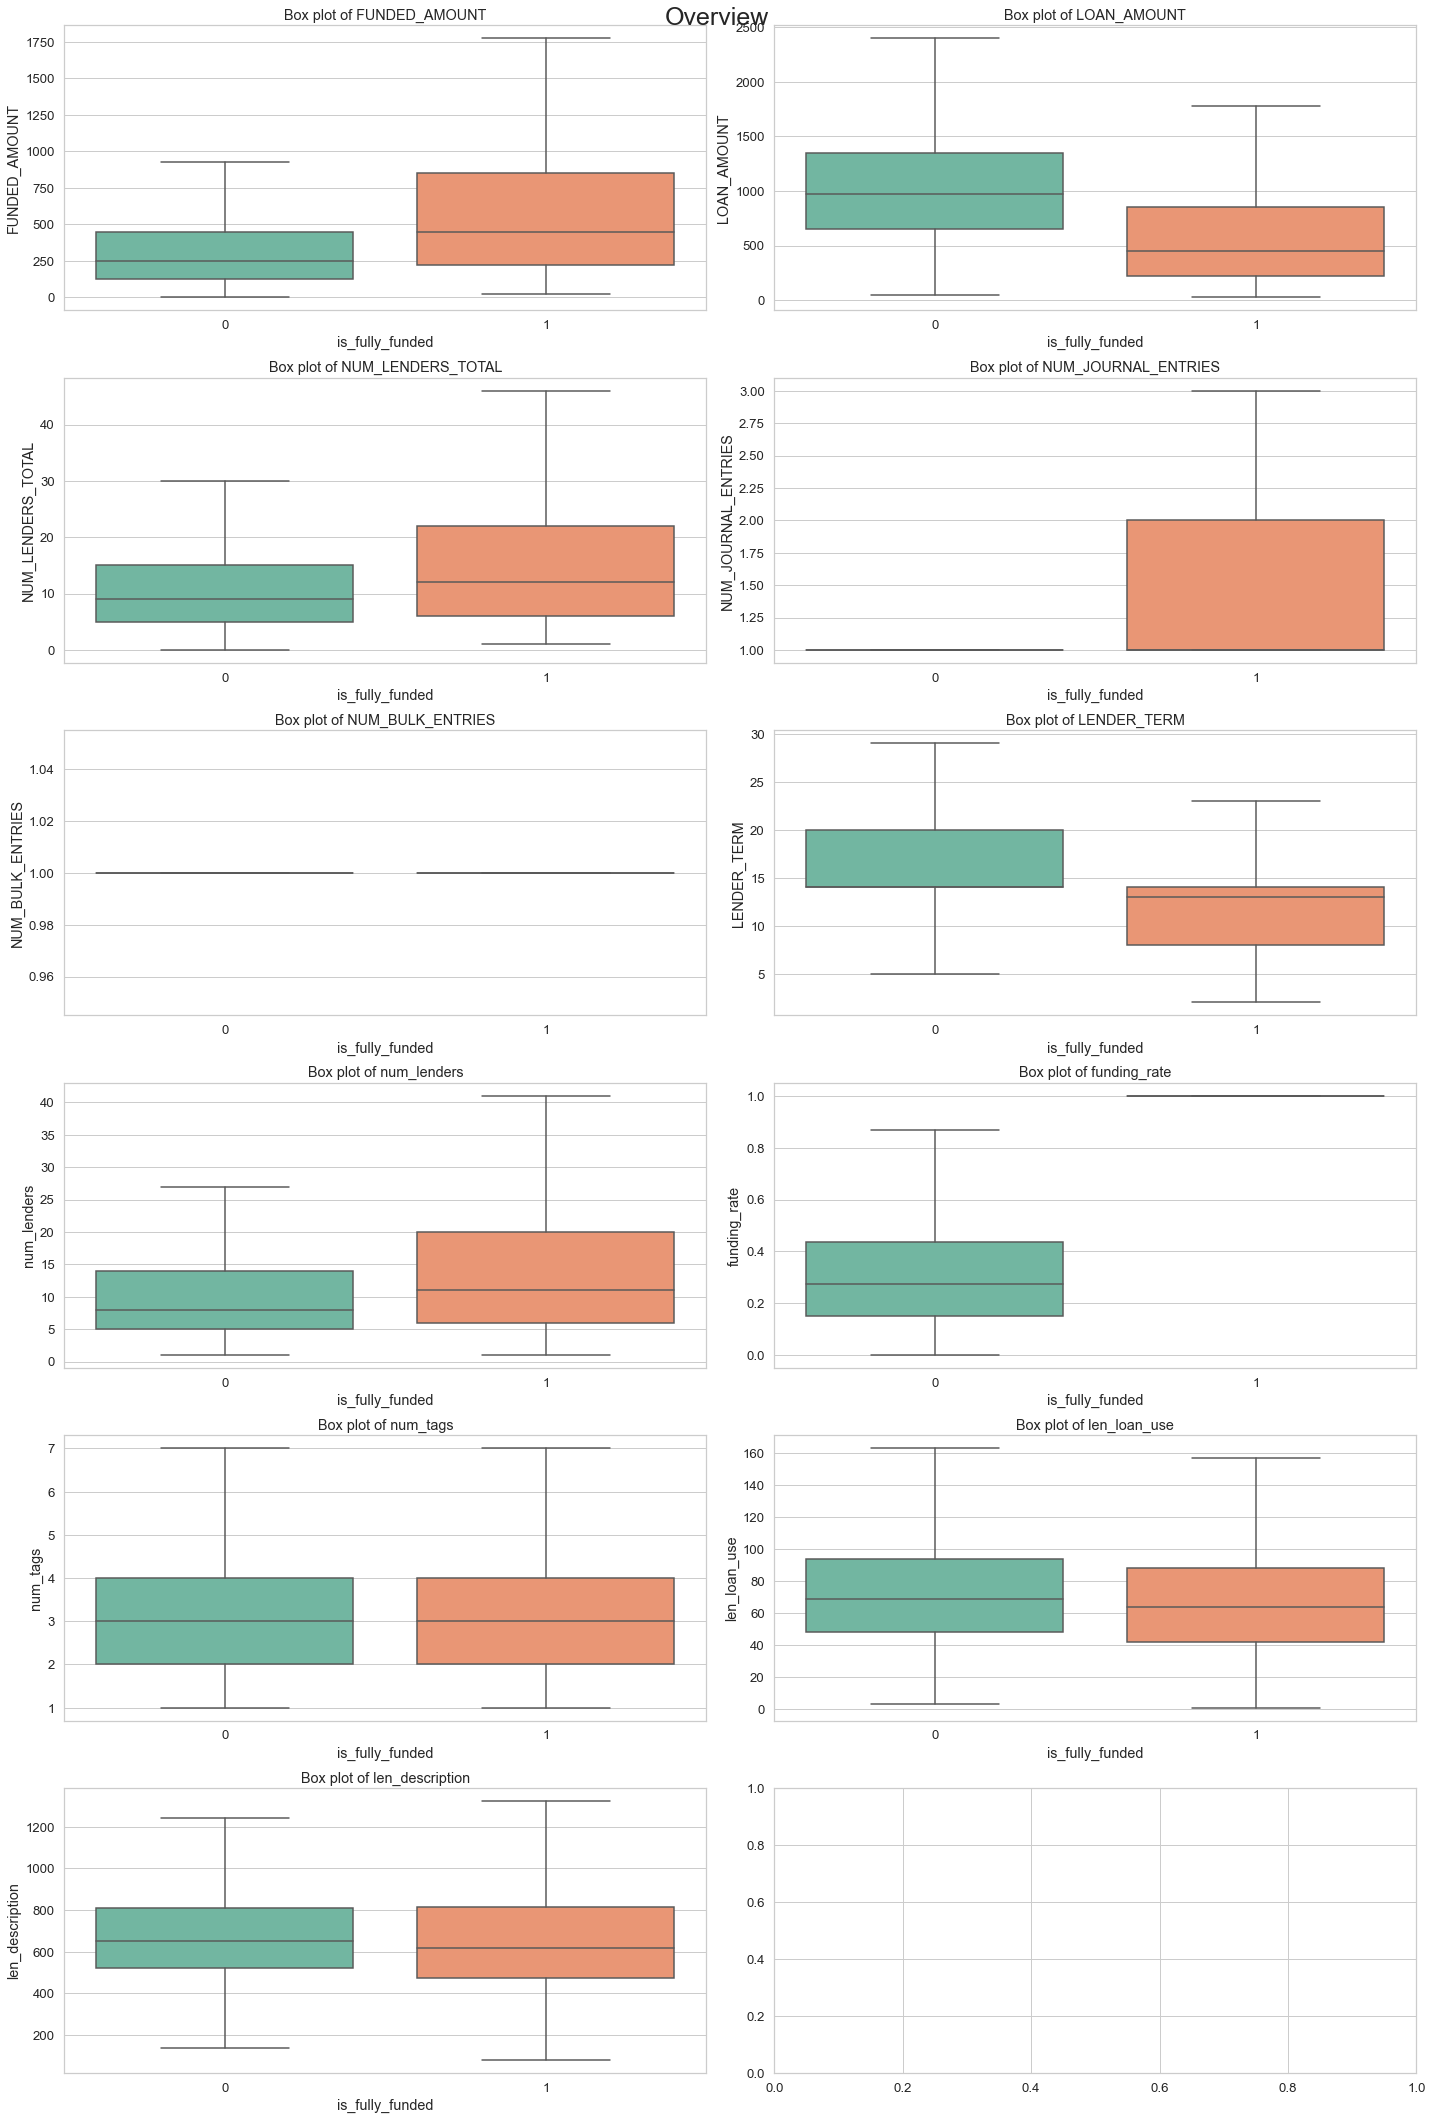

In [56]:
plot_by = ['FUNDED_AMOUNT', 'LOAN_AMOUNT','NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES',
           'LENDER_TERM', 'num_lenders', 'funding_rate','num_tags','len_loan_use','len_description']
fig, ax = plt.subplots(int(np.ceil(len(plot_by)/2)), 2, figsize=(20, 30))
fig.suptitle("Overview", fontsize=25)
for variable, subplot in zip(plot_by, ax.flatten()):
    sns.boxplot(x='is_fully_funded', y=variable,data=loan_1819, ax=subplot,palette='Set2',showfliers=False)
    subplot.title.set_text(f"Box plot of {variable}")
    plt.tight_layout()

Fully funded loans have shorter lender term, smaller loan amount and higher funded amount.

NLP: They have slightly shorter loan use description and loan description.

In [57]:
# only 5 characters shorter - not significant
loan_1819.groupby('is_fully_funded')['len_loan_use'].mean()

is_fully_funded
0   74.17
1   69.12
Name: len_loan_use, dtype: float64

In [58]:
# 23 characters shorter - that's about 3-4 words?
loan_1819.groupby('is_fully_funded')['len_description'].mean()

is_fully_funded
0   690.21
1   667.41
Name: len_description, dtype: float64

In [59]:
loans_lenders['list_lenders'] = loans_lenders['LENDERS'].apply(lambda x: x.split(', '))
loans_lenders = loans_lenders.explode('list_lenders')
loans_lenders.head()

,LOAN_ID,LENDERS,num_lenders,list_lenders
0,233239,"sergio2573, janet7717, ridley9296, maureen2394...",73,sergio2573
0,233239,"sergio2573, janet7717, ridley9296, maureen2394...",73,janet7717
0,233239,"sergio2573, janet7717, ridley9296, maureen2394...",73,ridley9296
0,233239,"sergio2573, janet7717, ridley9296, maureen2394...",73,maureen2394
0,233239,"sergio2573, janet7717, ridley9296, maureen2394...",73,mark3782


In [60]:
loans_lenders['list_lenders'].nunique()

1635868

In [61]:
fp_df = pd.read_csv('field_partner_detailed_info_no_dup.csv')

In [62]:
loan_fp = pd.merge(loan_df[loan_df['POSTED_YEAR']=='2019'],fp_df,how='left',left_on='PARTNER_ID',right_on='id')

In [63]:
loan_fp['id'].isnull().sum()/loan_fp.shape[0]

0.023734617931097463

In [64]:
loan_fp['id'].isnull().sum()

5198

In [65]:
loan_fp['id'].nunique()

181

In [66]:
loan_fp['PARTNER_ID'].nunique()

193